In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lbl2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 MB 8.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

# Twitter

### Read Data

Make sure you have google drive mounted to access the shared folders. You may have to edit the base file path to point to the correct location.

In [293]:
base_path = "/content/drive/MyDrive"

DATA_PATH=f"{base_path}/FYP/Data/Islamophobic-Tweets/islamophobic-tweets-clean.csv"
RAW_DATA_PATH=f"{base_path}/FYP/Data/Islamophobic-Tweets/english-anot-shuffled.csv"
THETA_PATH=f"{base_path}/FYP/Data/STTM Intermediate Output/Twitter-LDA-80/twitter.theta"
ASSIGNMENTS_PATH=f"{base_path}/FYP/Data/STTM Intermediate Output/Twitter-LDA-80/twitter.topicAssignments"
TOP_WORDS=f"{base_path}/FYP/Data/STTM Intermediate Output/Twitter-LDA-80/twitter.topWords"
PHI_PATH=f"{base_path}/FYP/Data/STTM Intermediate Output/Twitter-LDA-80/twitter.phi"
VOCAB_PATH=f"{base_path}/FYP/Data/STTM Intermediate Output/Twitter-LDA-80/twitter.vocabulary"

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

"""
0. Neither Islamaphobic Nor About Islam
1. About Islam Not Islamaphobic
2. Islamphobic

Islamaphobic classification
.apply(lambda x : 1 if x == 2 else 0)
class_names = ["Not Islamaphobic", "Islamophobic"]

Islamic classification
.apply(lambda x : 0 if x == 0 else 1)
class_names = ["Non Islamic", "Islamic"]
"""

class_names = ["Non Islamic", "Islamic"]
num_topics = 80

# Create column names according to the number of topics
topic_columns = [f"topic {i+1}" for i in range(num_topics)]

documents_df = pd.read_csv(DATA_PATH)
documents_df['class'] = documents_df['class'].apply(lambda x : 0 if x == 0 else 1) # Binary Class
documents_df

,document,class
0,start early,0
1,jumaat kareem muslim brother world alhamdulill...,1
2,thorpe england head coach pakistan silverwood ...,0
3,plymouth cricket transmission,0
4,jungkook catch eat food ramadan imaam friend m...,1
...,...,...
8366,cricket scoreline,0
8367,qanon terrorist organisation trump well call m...,1
8368,franchise cricket tournament well fielding cpl...,0
8369,muslim apj abdul kalam sir terrorist eye proph...,1


In [295]:
import pandas as pd

# Read the data from the file
with open(THETA_PATH, 'r') as file:
    lines = file.readlines()

# Split the data into individual values and convert them to float
data = []
for line in lines:
    values = line.strip().split()
    data.extend([float(value) for value in values])

# Reshape the data into a 2D array with n-columns
num_rows = len(data) // num_topics
reshaped_data = [data[i*num_topics:(i+1)*num_topics] for i in range(num_rows)]

# Create a DataFrame from the reshaped data
combined_df = pd.DataFrame(reshaped_data)

# Display the DataFrame
combined_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
1,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,...,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
2,0.073333,0.006667,0.006667,0.006667,0.006667,0.073333,0.006667,0.006667,0.006667,0.006667,...,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
3,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,...,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091
4,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.068750,0.006250,0.006250,0.006250,...,0.006250,0.006250,0.006250,0.068750,0.006250,0.006250,0.006250,0.006250,0.006250,0.068750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
8367,0.005556,0.116667,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,...,0.061111,0.005556,0.005556,0.061111,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556
8368,0.006250,0.006250,0.068750,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,...,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250
8369,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,...,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882


In [296]:
combined_df["class"] = documents_df["class"]
combined_df

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,class
0,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0
1,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,...,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,1
2,0.073333,0.006667,0.006667,0.006667,0.006667,0.073333,0.006667,0.006667,0.006667,0.006667,...,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0
3,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,...,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0
4,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.068750,0.006250,0.006250,0.006250,...,0.006250,0.006250,0.068750,0.006250,0.006250,0.006250,0.006250,0.006250,0.068750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0
8367,0.005556,0.116667,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,...,0.005556,0.005556,0.061111,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,1
8368,0.006250,0.006250,0.068750,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,...,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0
8369,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,...,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,0.005882,1


### Visualize mean topic probabilities for each Class

In [297]:
grouped_df = combined_df.groupby('class').mean()
grouped_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
class,,,,,,,,,,,,,,,,,,,,,
0,0.015012,0.012389,0.013977,0.016063,0.014837,0.008884,0.011434,0.008912,0.009698,0.013578,...,0.009080,0.009129,0.018836,0.011353,0.008021,0.008741,0.015550,0.012037,0.011832,0.011957
1,0.009892,0.010486,0.009119,0.009208,0.009571,0.018805,0.010711,0.017705,0.013669,0.009606,...,0.015663,0.014714,0.008712,0.012300,0.026687,0.018463,0.009064,0.010625,0.010897,0.011343


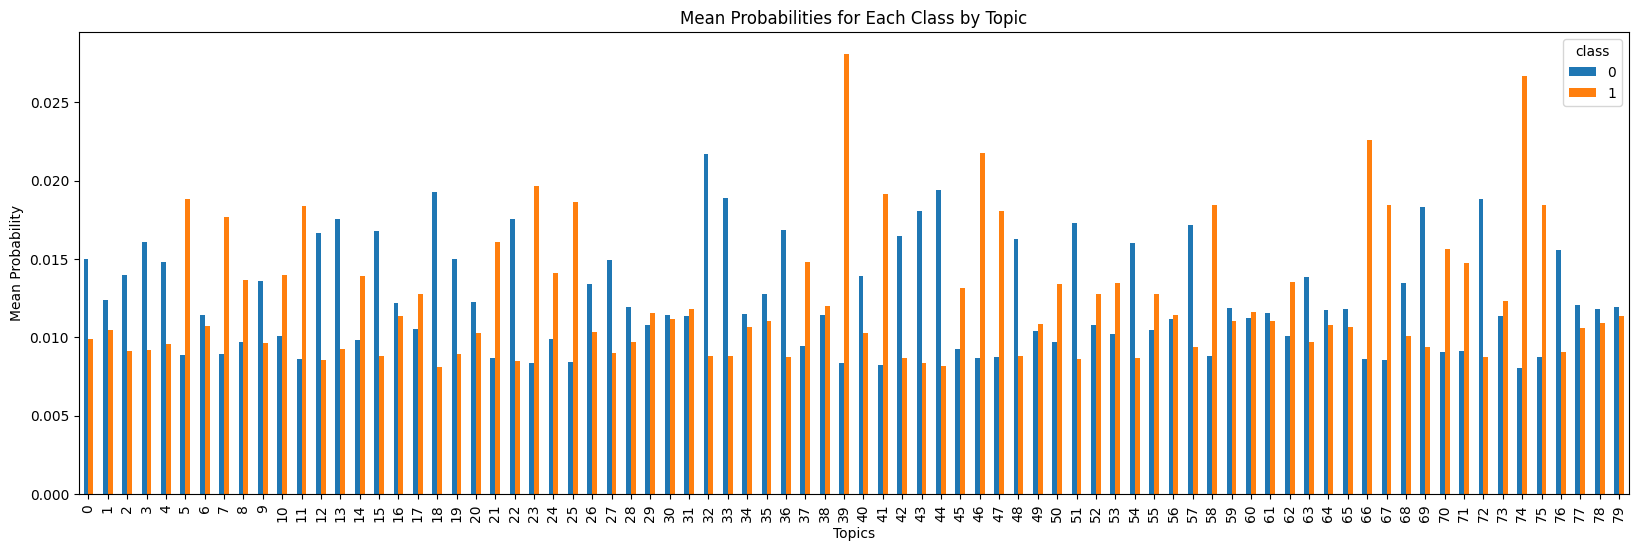

In [298]:
import matplotlib.pyplot as plt

ax = grouped_df.T.plot(kind='bar', figsize=(20, 6))
ax.set_ylabel('Mean Probability')
ax.set_xlabel('Topics')
ax.set_title('Mean Probabilities for Each Class by Topic')
plt.show()

### Process Data

In [299]:
import pandas as pd

# Return True if there is a difference of 33% from all other columns
def check_differences(value, values):
    for other_value in values:
        if value * 0.33 > abs(value - other_value):
            return False
    return True

# Define a function to find columns with difference >= 33% from other columns
def find_columns_with_differences(row):
    # Initialize a list to store column indices
    different_columns = []

    # Iterate over each column
    for col in grouped_df.columns:
        # Get the value of the current column in the current row
        current_value = row[col]

        # Get the others values of the current column across all rows
        other_values = grouped_df[col].tolist()
        other_values.remove(current_value)

        if check_differences(current_value, other_values):
            different_columns.append(1)
        else:
            different_columns.append(0)

    return different_columns

# Apply the function row-wise to find columns with differences >= 33%
unique_columns = grouped_df.apply(find_columns_with_differences, axis=1)
unique_columns

class
0    [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, ...
1    [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, ...
dtype: object

In [300]:
import pandas as pd

# Utility function
def get_topic_assignments():
    word_topic_assignments = []
    with open(ASSIGNMENTS_PATH, 'r') as f:
        for line in f:
            topics = list(map(int, line.strip().split()))
            word_topic_assignments.append(topics)
    return word_topic_assignments

# Get only Top words from the .topwords file for each selected topic
def get_top_words(row, unique_column):
    words = set()

    with open(TOP_WORDS, 'r') as f:
        data = f.readlines()
        print(data)
        for i, value in enumerate(unique_column):
            if value:
                words.update(data[i].rstrip().split(' '))
    return words

# Get all words for each selected topic
def get_all_words(documents, unique_column):
    words = set()
    assigments = get_topic_assignments()

    for index in documents.index:
        assignment = assigments[index]
        document = documents[index].split(' ')

        unique_words = []
        for i, word in enumerate(document):
            if unique_column[assignment[i]]:
                unique_words.append(word)
        words.update(unique_words)
    return words


df = pd.read_csv(DATA_PATH)
df['class'] = df['class'].apply(lambda x : 0 if x == 0 else 1)

set0 = get_all_words(df[df['class']==0]['document'], unique_columns[0])
set1 = get_all_words(df[df['class']==1]['document'], unique_columns[1])

In [301]:
data={"class_index":[0, 1],
      "class_name":class_names,
      "keywords":[list(set0 - set1), list(set1 - set0)],
      "number_of_keywords":[len(list(set0 - set1)), len(list(set1 - set0))]}
labels = pd.DataFrame(data)
labels

,class_index,class_name,keywords,number_of_keywords
0,0,Non Islamic,"[narrative, knuckle, semis, oliver, bhagalpur,...",2608
1,1,Islamic,"[lebanese, treat, daddy, puran, tol, breed, er...",2031


### Lbl2Vec Training

In [302]:
from gensim.utils import simple_preprocess

# doc: document text string
# returns tokenized document
# simple preprocess converts a document into a list of lowercase tokens, ignoring tokens that are too short or too long
# simple preprocess also removes numerical values as well as punctuations
def tokenize(doc):
    return simple_preprocess(doc, deacc=True, min_len=2, max_len=15)

In [303]:
from gensim.models.doc2vec import TaggedDocument

# tokenize and tag documents for Lbl2Vec training
# tagged_docs: list of tokens in a doc + doc's unique ID(doc_key)
df['tagged_docs'] = df.apply(lambda row: TaggedDocument(tokenize(row['document']), [str(row.name)]), axis=1)
# add doc_key column
df['doc_key'] = df.index.astype(str)
# add class_name column
df = df.merge(labels, left_on='class', right_on='class_index', how='left').drop(['class', 'keywords'], axis=1)
df

,document,tagged_docs,doc_key,class_index,class_name,number_of_keywords
0,start early,"([start, early], [0])",0,0,Non Islamic,2608
1,jumaat kareem muslim brother world alhamdulill...,"([jumaat, kareem, muslim, brother, world, alha...",1,1,Islamic,2031
2,thorpe england head coach pakistan silverwood ...,"([thorpe, england, head, coach, pakistan, silv...",2,0,Non Islamic,2608
3,plymouth cricket transmission,"([plymouth, cricket, transmission], [3])",3,0,Non Islamic,2608
4,jungkook catch eat food ramadan imaam friend m...,"([jungkook, catch, eat, food, ramadan, imaam, ...",4,1,Islamic,2031
...,...,...,...,...,...,...
8366,cricket scoreline,"([cricket, scoreline], [8366])",8366,0,Non Islamic,2608
8367,qanon terrorist organisation trump well call m...,"([qanon, terrorist, organisation, trump, well,...",8367,1,Islamic,2031
8368,franchise cricket tournament well fielding cpl...,"([franchise, cricket, tournament, well, fieldi...",8368,0,Non Islamic,2608
8369,muslim apj abdul kalam sir terrorist eye proph...,"([muslim, apj, abdul, kalam, sir, terrorist, e...",8369,1,Islamic,2031


In [304]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_df

,document,tagged_docs,doc_key,class_index,class_name,number_of_keywords
1832,happy islamic new celebrate month muharram,"([happy, islamic, new, celebrate, month, muhar...",1832,1,Islamic,2031
3286,indian muslim brother sister,"([indian, muslim, brother, sister], [3286])",3286,1,Islamic,2031
3820,rafale deal perfect example upa bjp upa start ...,"([rafale, deal, perfect, example, upa, bjp, up...",3820,0,Non Islamic,2608
1575,gop american equivalent radical islamic terror...,"([gop, american, equivalent, radical, islamic,...",1575,1,Islamic,2031
6434,king cricket legend cricket msdhoni dhoni,"([king, cricket, legend, cricket, msdhoni, dho...",6434,0,Non Islamic,2608
...,...,...,...,...,...,...
5734,isis bride return rot dog bear stable horse br...,"([isis, bride, return, rot, dog, bear, stable,...",5734,1,Islamic,2031
5191,tthis disturb bounty specific issue cut dry ru...,"([tthis, disturb, bounty, specific, issue, cut...",5191,0,Non Islamic,2608
5390,cricket crih cut minor trigger wooden crate box,"([cricket, crih, cut, minor, trigger, wooden, ...",5390,0,Non Islamic,2608
860,engvpak newly adopt flexible approach starting...,"([engvpak, newly, adopt, flexible, approach, s...",860,0,Non Islamic,2608


In [305]:
from gensim.models.doc2vec import Doc2Vec
# Train Doc2Vec model:
# in order to get optimal Lbl2Vec results the given Doc2Vec model should be trained with the parameters “dbow_words=1” and “dm=0”.
# doc2vec_model = Doc2Vec(documents=train_df['tagged_docs'], dbow_words=1, dm=0, epochs=20)
# or
doc2vec_model = Doc2Vec.load("twitter_80_doc2vec_islamic")

# doc2vec_model.save("twitter_80_doc2vec_islamaphobic")

In [306]:
from lbl2vec import Lbl2Vec

# init model with parameters
Lbl2vec_model = Lbl2Vec(keywords_list=list(labels['keywords']), doc2vec_model=doc2vec_model,
                        label_names=list(labels['class_name']), similarity_threshold=0.30,
                        min_num_docs=100, epochs=100, min_count=10)

# init model with parameters
# Lbl2vec_model = Lbl2Vec(keywords_list=list(labels['keywords']), tagged_documents=train_df['tagged_docs'],
#                         label_names=list(labels['class_name']), similarity_threshold=0.30, min_num_docs=100, epochs=20, min_count=10)

# train model
Lbl2vec_model.fit()

2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings
2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings
2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings
2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings
2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings
2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings
2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings
2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings
2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings
2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings
2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings
2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings
2024-05-02 18:26:35,485 - Lbl2Vec - INFO - Load document and word embeddings

In [307]:
# predict similarity scores
model_docs_lbl_similarities = Lbl2vec_model.predict_model_docs()
model_docs_lbl_similarities

2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddings from model
2024-05-02 18:26:35,998 - Lbl2Vec - INFO - Get document embeddin

,doc_key,most_similar_label,highest_similarity_score,Non Islamic,Islamic
0,1832,Islamic,0.753612,0.753608,0.753612
1,3286,Islamic,0.860790,0.860788,0.860790
2,3820,Non Islamic,0.779524,0.779524,0.779516
3,1575,Islamic,0.909955,0.909951,0.909955
4,6434,Non Islamic,0.717532,0.717532,0.717521
...,...,...,...,...,...
7528,5734,Non Islamic,0.766556,0.766556,0.766555
7529,5191,Islamic,0.914472,0.914472,0.914472
7530,5390,Non Islamic,0.940824,0.940824,0.940820
7531,860,Non Islamic,0.771535,0.771535,0.771529


In [308]:
new_docs_lbl_similarities = Lbl2vec_model.predict_new_docs(tagged_docs=test_df['tagged_docs'])
new_docs_lbl_similarities

2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculate document embeddings
2024-05-02 18:26:45,320 - Lbl2Vec - INFO - Calculat

,doc_key,most_similar_label,highest_similarity_score,Non Islamic,Islamic
0,8297,Non Islamic,0.775565,0.775565,0.775560
1,1729,Non Islamic,0.782871,0.782871,0.782868
2,6919,Non Islamic,0.681260,0.681260,0.681252
3,2210,Islamic,0.722774,0.722766,0.722774
4,5400,Non Islamic,0.665085,0.665085,0.665084
...,...,...,...,...,...
833,2201,Non Islamic,0.633799,0.633799,0.633794
834,1656,Non Islamic,0.651961,0.651961,0.651952
835,4945,Islamic,0.696384,0.696376,0.696384
836,5332,Islamic,0.683614,0.683608,0.683614


### Evaluation

In [309]:
from sklearn.metrics import precision_score, recall_score, f1_score

# merge DataFrames to compare the predicted and true topic labels
evaluation_test = new_docs_lbl_similarities.merge(test_df, left_on='doc_key', right_on='doc_key')
y_true_test = evaluation_test['class_name']
y_pred_test = evaluation_test['most_similar_label']

# Compute precision, recall, and F1 score
f1 = f1_score(y_true_test, y_pred_test, average='micro')

print('F1 score:', f1)

F1 score: 0.8747016706443914


In [310]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_true_test, y_pred_test)

# Print the classification report
print(report)

              precision    recall  f1-score   support

     Islamic       0.91      0.87      0.89       480
 Non Islamic       0.83      0.89      0.86       358

    accuracy                           0.87       838
   macro avg       0.87      0.88      0.87       838
weighted avg       0.88      0.87      0.88       838

